<a href="https://colab.research.google.com/github/nbilasals/student-dropout/blob/main/notebook_edutech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:Nabilla Salsa
- Email: nsalshabila15@gmail.com
- Id Dicoding:nbilasals

## Persiapan

### Menyiapkan library yang dibutuhkan

In [16]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

### Menyiapkan data yang akan diguankan

## Data Understanding

In [18]:
# Dataset import from Dicoding GitHub Repository
dataset_url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv'

# Read dataset
data = pd.read_csv(dataset_url, delimiter=';')
data

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [7]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [20]:
data.isnull().sum()/len(data)*100

,0
Marital_status,0.0
Application_mode,0.0
Application_order,0.0
Course,0.0
Daytime_evening_attendance,0.0
Previous_qualification,0.0
Previous_qualification_grade,0.0
Nationality,0.0
Mothers_qualification,0.0
Fathers_qualification,0.0


## Data Preparation / Preprocessing

In [19]:
data.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)

From above, we can say that there is no null values in the dataset, which is a good news

In [22]:
print(data["Status"].unique())

['Dropout' 'Graduate' 'Enrolled']


In [23]:
data['Status'] = data['Status'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

Find how the features are correlated with the Target

In [24]:
data.corr()['Status']

,Status
Marital_status,-0.089804
Application_mode,-0.221747
Application_order,0.089791
Course,0.034219
Daytime_evening_attendance,0.075107
Previous_qualification,-0.056039
Previous_qualification_grade,0.103764
Nationality,-0.014801
Mothers_qualification,-0.043178
Fathers_qualification,-0.001393


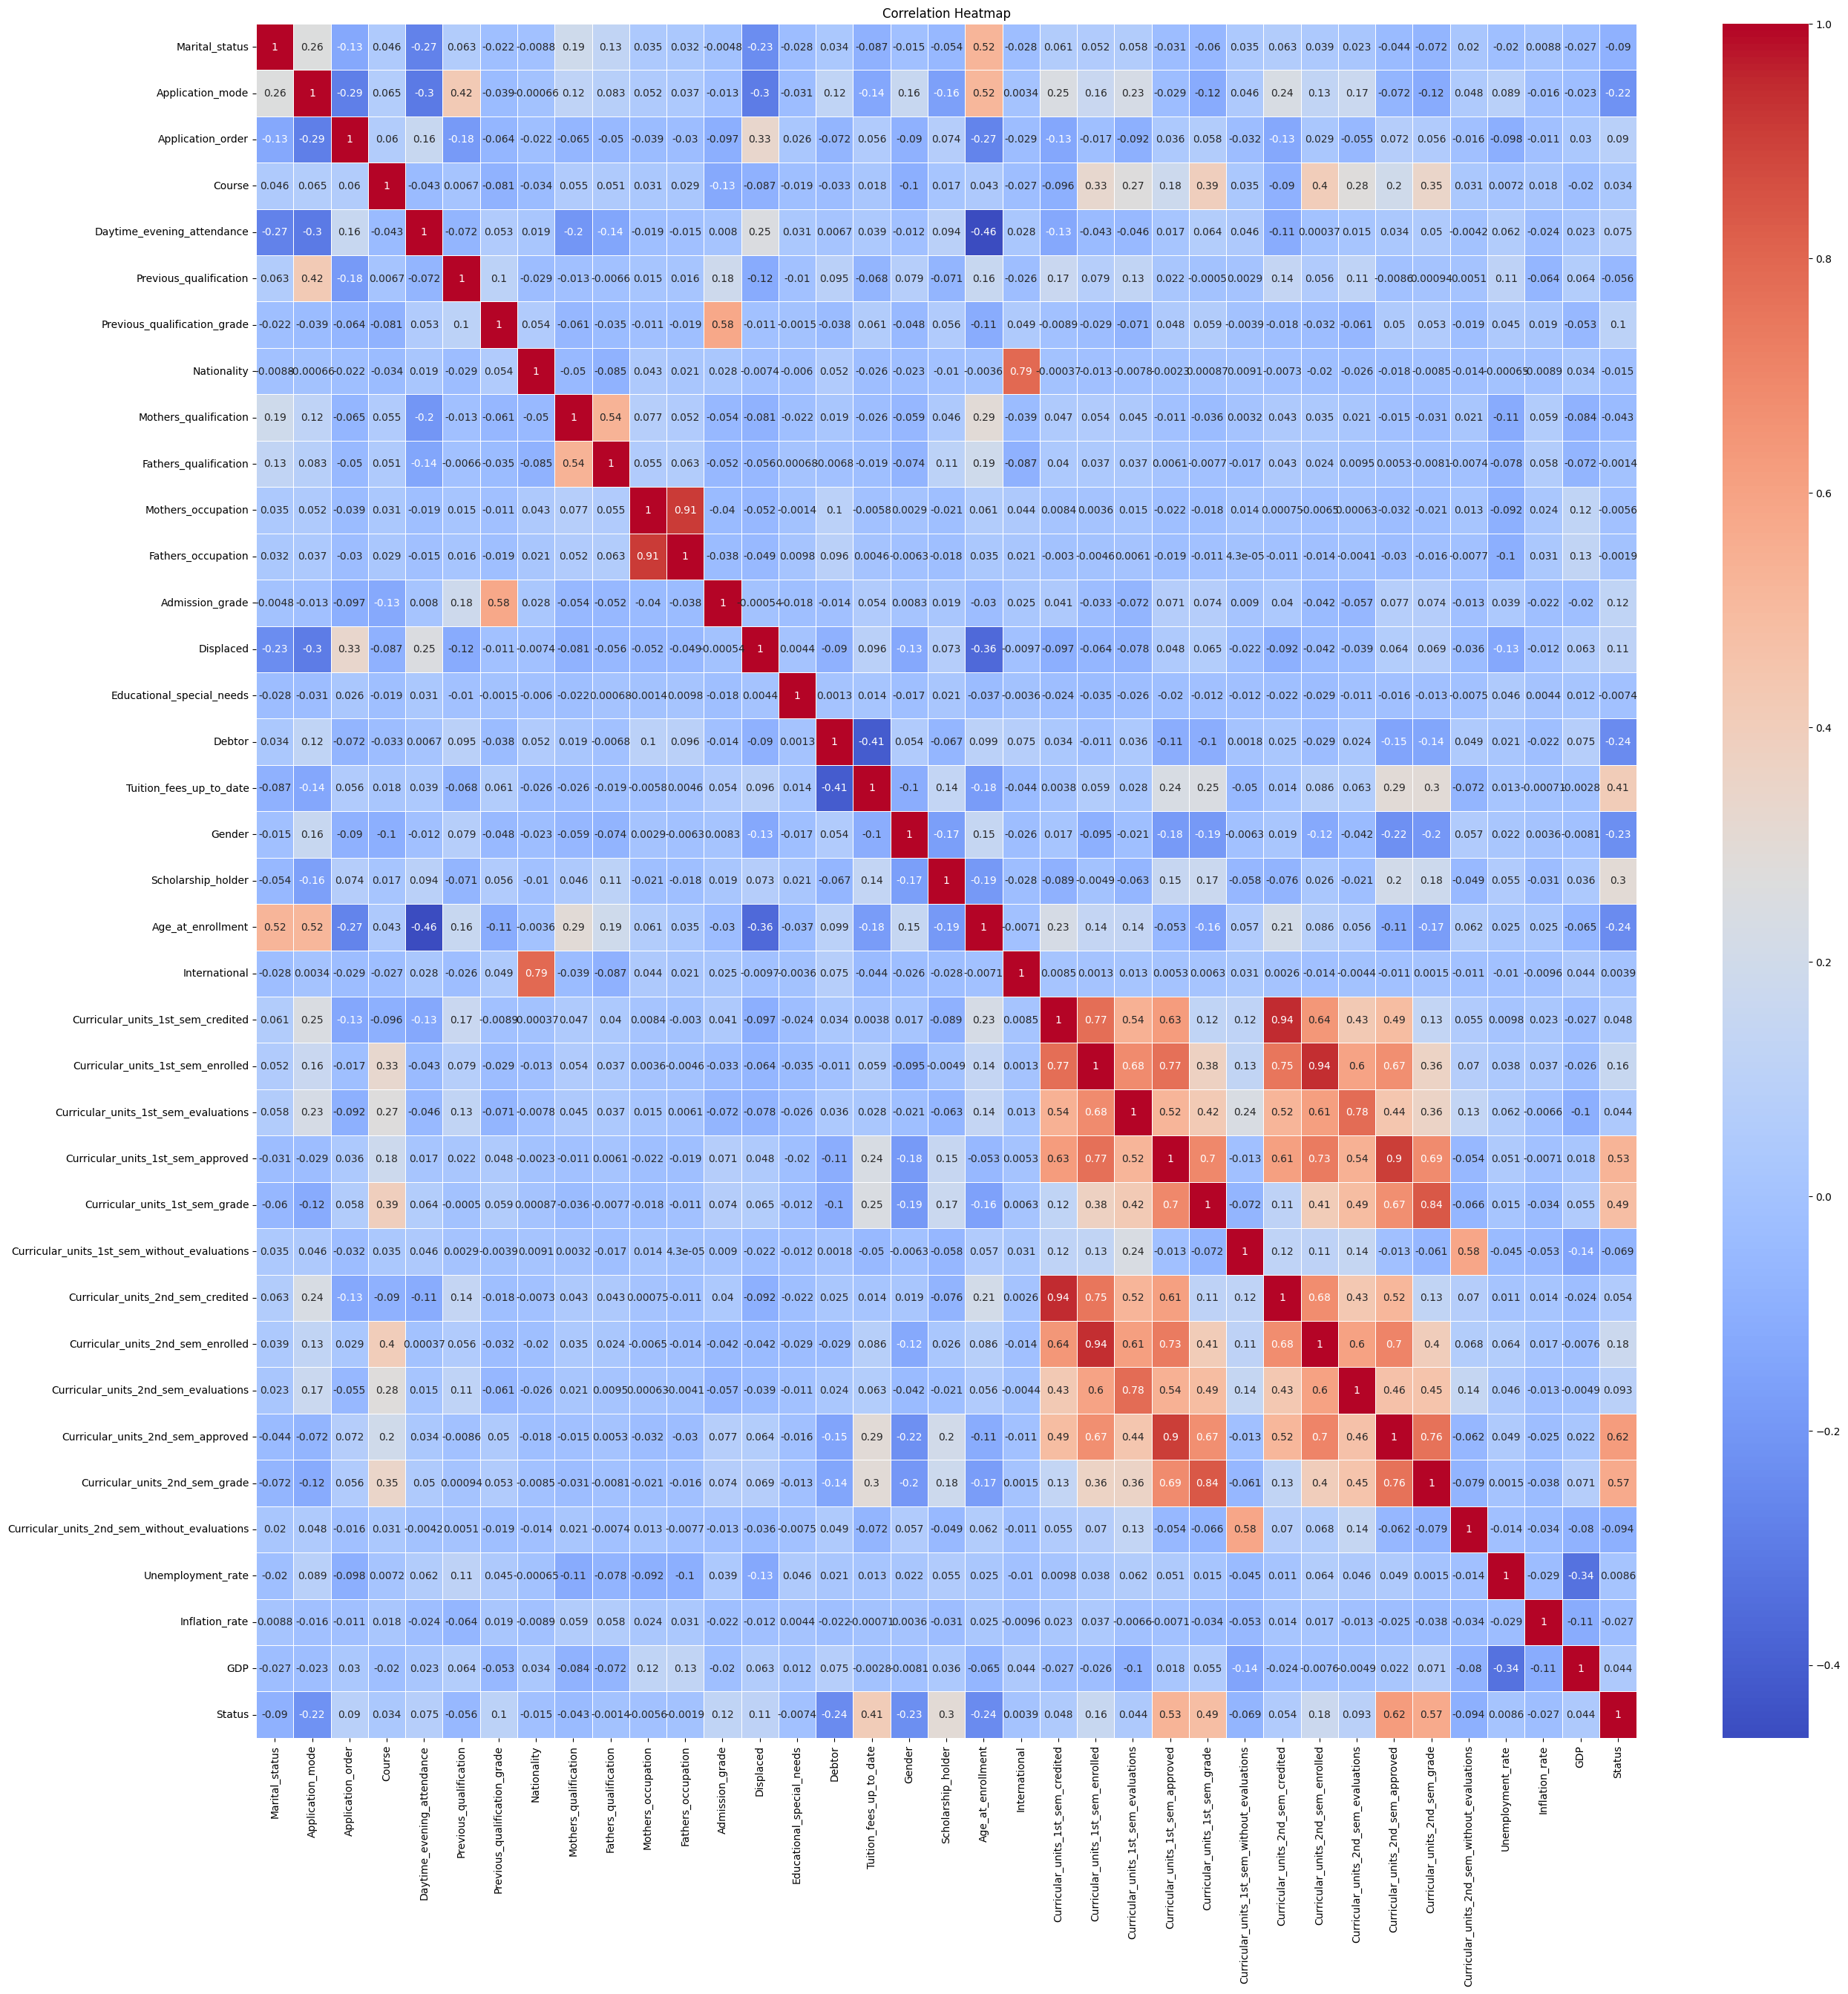

In [25]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Some columns have very low correlation with the target, which means they don’t seem to affect the outcome much. These columns are:
- Nationality
- Mother’s qualification
- Father’s qualification
- Educational special needs
- International
- Curricular units 1st sem (without evaluations)
- Unemployment rate
- Inflation rate

Since their correlation values are very close to zero, we can consider removing them from the model because they likely don’t help in predicting the target.

In [27]:
new_data = data.copy()
new_data = new_data.drop(columns=['Nationality',
                                  'Mothers_qualification',
                                  'Fathers_qualification',
                                  'Educational_special_needs',
                                  'International',
                                  'Curricular_units_1st_sem_without_evaluations',
                                  'Unemployment_rate',
                                  'Inflation_rate'], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Mothers_occupation                            4424 non-null   int64  
 8   Fathers_occupation                            4424 non-null   int64  
 9   Admission_grade                               4424 non-null   f

In [28]:
new_data['Status'].value_counts()

,count
Status,
2,2209
0,1421
1,794


In [29]:
x = new_data['Status'].value_counts().index
y = new_data['Status'].value_counts().values

df = pd.DataFrame({
    'Status': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Status',
             values ='Count_T',
            title='How many dropouts, enrolled & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

The data shows a class imbalance with more graduates compared to dropouts and enrolled students. This imbalance should be considered when building predictive models, as it may bias the model towards predicting the majority class (graduates).

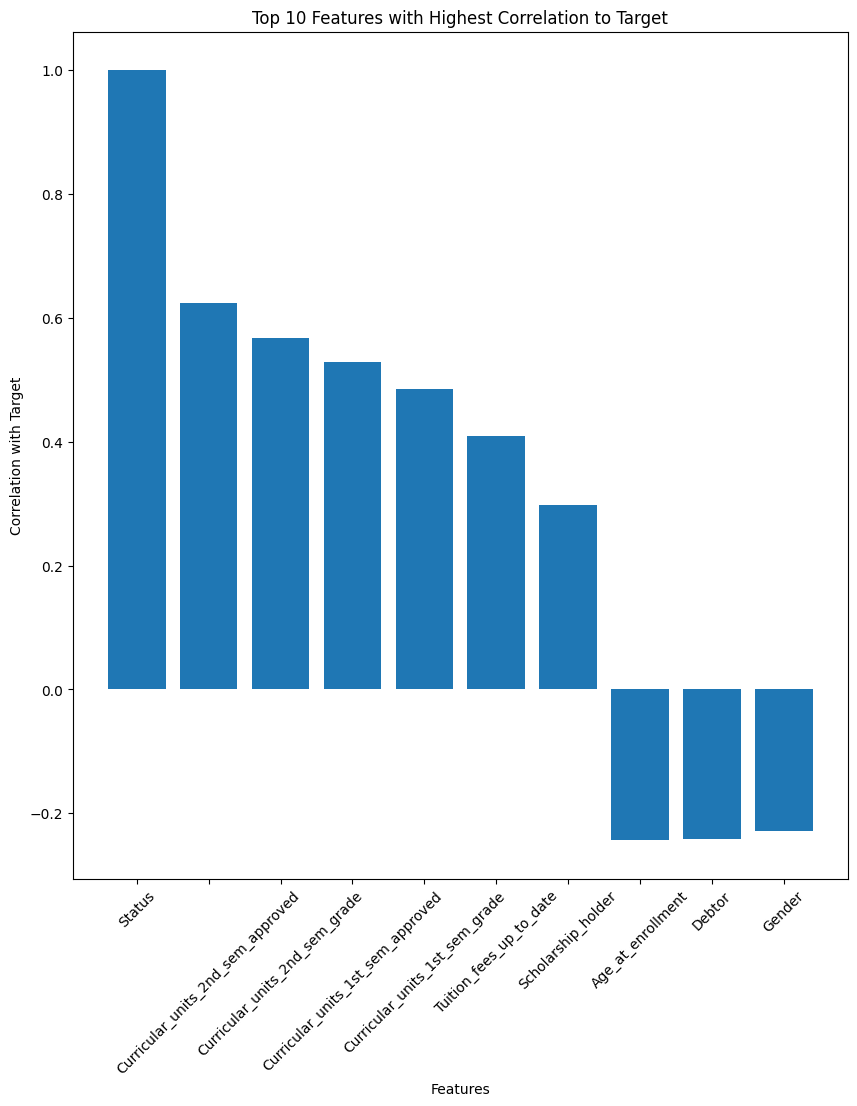

In [31]:
correlations = data.corr()['Status']
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features]

plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Top 10 Features with Highest Correlation to Target')
plt.xticks(rotation=45)
plt.show()

In [33]:
#Distribution of age of students at the time of enrollment

px.histogram(new_data['Age_at_enrollment'], x='Age_at_enrollment',color_discrete_sequence=['lightblue'])


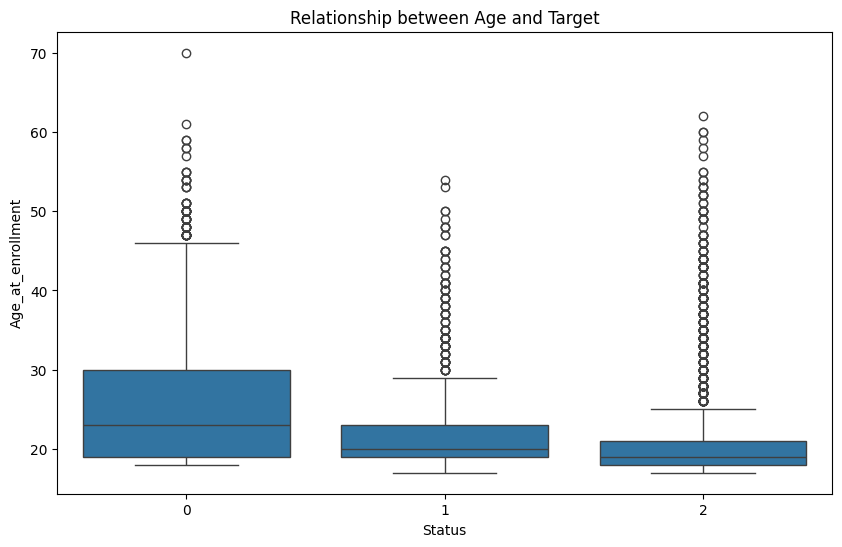

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Age_at_enrollment', data=new_data)
plt.xlabel('Status')
plt.ylabel('Age_at_enrollment')
plt.title('Relationship between Age and Target')
plt.show()

In [49]:
import plotly.express as px

# Assuming 'new_data' DataFrame from the previous code is available

fig = px.histogram(new_data, x="Marital_status", color="Status", barmode="group",
                   title="Distribution of Status by Marital Status",
                   labels={"Marital_status": "Marital Status", "Status": "Status"},
                   category_orders={"Status": [0, 1, 2]}) # Order the status categories
fig.show()


In [50]:
fig = px.histogram(new_data, x="Gender", color="Status", barmode="group",
                   title="Distribution of Status by Gender",
                   labels={"Gender": "Gender", "Status": "Status"},
                   category_orders={"Status": [0, 1, 2]}) # Order the status categories
fig.show()


In [53]:
fig = px.histogram(new_data, x="Daytime_evening_attendance", color="Status", barmode="group",
                   title="Distribution of Status by Daytime/Evening Attendance",
                   labels={"Daytime/evening_attendance": "Daytime/Evening Attendance", "Status": "Status"},
                   category_orders={"Status": [0, 1, 2]}) # Order the status categories
fig.show()


In [35]:
X = new_data.drop('Status', axis=1)
y = new_data['Status']

## Modeling

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [37]:
dtree = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=2)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)
xbc = XGBClassifier(tree_method='gpu_hist')
svm = svm.SVC(kernel='linear',probability=True)

In [39]:
dtree.fit(X_train,y_train)
rfc.fit(X_train,y_train)
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
abc.fit(X_train, y_train)
xbc = XGBClassifier(tree_method='hist')
svm.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



SVC(kernel='linear', probability=True)

## Evaluation

In [40]:
y_pred = dtree.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 67.8 %


In [41]:
y_pred = rfc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 80.68 %


In [42]:
y_pred = lr.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 67.01 %


In [43]:
y_pred = knn.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 62.82 %


In [44]:
y_pred = abc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 75.93 %


In [46]:
y_pred = svm.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 77.4 %


Ensemble Voting Classifier to improve accuracy

In [47]:
ens1 = VotingClassifier(estimators=[('rfc', rfc), ('lr', lr), ('abc',abc), ('xbc',xbc)], voting='soft')
ens1.fit(X_train, y_train)

y_pred = ens1.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy : 80.11 %


In [48]:
ens2 = VotingClassifier(estimators=[('rfc', rfc), ('lr', lr), ('abc',abc), ('xbc',xbc)], voting='hard')
ens2.fit(X_train, y_train)

y_pred = ens2.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy : 80.34 %
